<a href="https://colab.research.google.com/github/shritigupta/EIP/blob/master/assign1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [4]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


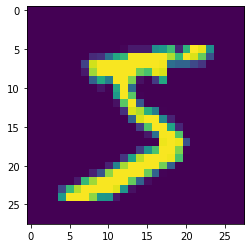

In [7]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [12]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [126]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 3,3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(128, 3,3, activation='relu'))

model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 10))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if __name__ == '__main__':


In [134]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_193 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_194 (Conv2D)          (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_195 (Conv2D)          (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_196 (Conv2D)          (None, 10, 10, 10)        1290      
_________________________________________________________________
conv2d_197 (Conv2D)          (None, 1, 1, 10)          10010     
_________________________________________________________________
flatten_12 (Flatten)         (None, 10)              

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [136]:
model.fit(X_train, Y_train, batch_size=32, epochs=15, verbose=1)

Epoch 1/15
60000/60000 [==============================] - 11s 178us/step - loss: 0.0075 - acc: 0.9977
Epoch 2/15
60000/60000 [==============================] - 9s 156us/step - loss: 0.0056 - acc: 0.9983
Epoch 3/15
60000/60000 [==============================] - 9s 157us/step - loss: 0.0046 - acc: 0.9983
Epoch 4/15
60000/60000 [==============================] - 9s 158us/step - loss: 0.0057 - acc: 0.9984
Epoch 5/15
60000/60000 [==============================] - 10s 164us/step - loss: 0.0058 - acc: 0.9982
Epoch 6/15
60000/60000 [==============================] - 9s 156us/step - loss: 0.0043 - acc: 0.9987
Epoch 7/15
60000/60000 [==============================] - 10s 159us/step - loss: 0.0052 - acc: 0.9984
Epoch 8/15
60000/60000 [==============================] - 9s 158us/step - loss: 0.0035 - acc: 0.9990
Epoch 9/15
60000/60000 [==============================] - 9s 158us/step - loss: 0.0046 - acc: 0.9985
Epoch 10/15
60000/60000 [==============================] - 9s 156us/step - loss: 0.0048 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [138]:
print(score)

[0.054246015515467184, 0.9915]


In [0]:
y_pred = model.predict(X_test)

In [140]:
print(y_pred[:9])
print(y_test[:9])

[[8.4201356e-24 2.4626780e-29 3.3455477e-22 5.2909351e-18 1.7543166e-32
  1.2391020e-28 0.0000000e+00 1.0000000e+00 1.6917606e-27 4.9574783e-18]
 [9.0693520e-26 1.0352240e-31 1.0000000e+00 2.4044639e-30 3.8193217e-37
  0.0000000e+00 1.2890223e-21 0.0000000e+00 1.0457418e-24 0.0000000e+00]
 [1.2932483e-21 1.0000000e+00 2.8163990e-12 3.0045381e-16 1.6665300e-12
  1.5288631e-11 3.3258490e-15 3.5980953e-12 1.5113735e-12 3.4471895e-17]
 [1.0000000e+00 3.3033266e-32 6.1469876e-18 4.7612001e-25 2.1656457e-26
  3.1150508e-23 7.9188192e-12 2.4937923e-27 2.0166041e-17 6.2019560e-20]
 [2.4035425e-26 7.4370979e-31 8.1645106e-29 8.3386190e-33 1.0000000e+00
  9.1978431e-27 2.5017458e-29 1.3852050e-29 2.6678350e-20 1.4291632e-13]
 [1.2731261e-20 1.0000000e+00 4.2713101e-13 1.0994530e-18 7.2505911e-11
  2.5210858e-16 6.6684566e-15 2.0114763e-09 1.6813559e-10 1.0203793e-18]
 [2.9600202e-30 3.7746994e-25 2.3340687e-15 3.8687666e-35 9.9977750e-01
  2.7517433e-18 2.5818287e-27 2.8568584e-24 2.2240594e-04 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

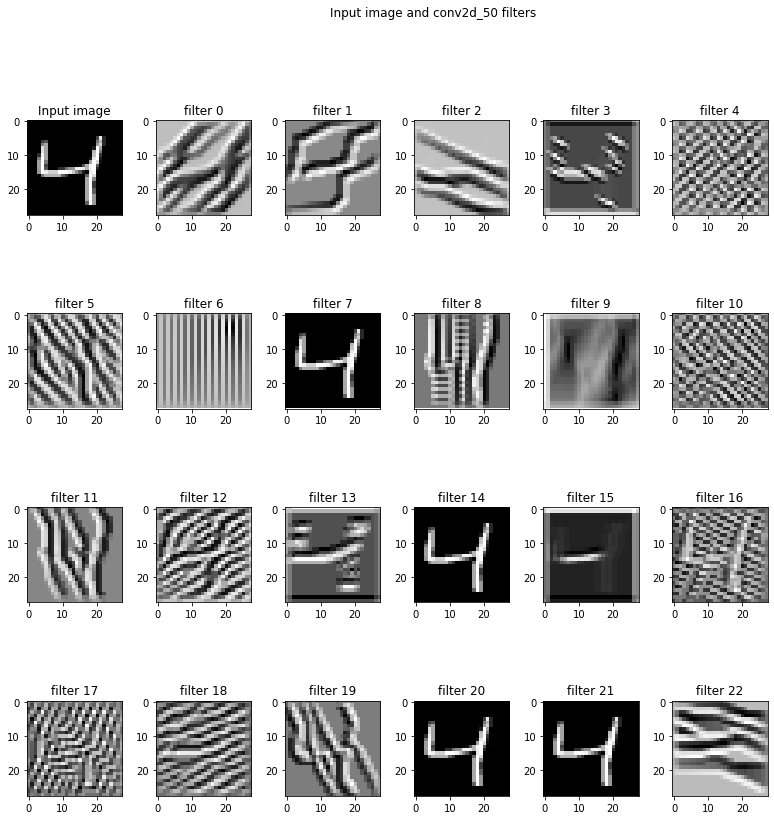

In [51]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_50'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()